In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('kc_house_data.csv')

In [5]:
# Melihat Isi Dari Data CSV Yang Diimpor
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [31]:
# Mengecek apakah ada data yang kosong
pd.isnull(data).sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

id : a notation for a house

date : Date house was sold

price : Price is prediction target

bedrooms : Number of Bedrooms/House

bathrooms : Number of bathrooms/House

sqft_living : square footage of the home

sqft_lot : square footage of the lot

floors : Total floors (levels) in house

waterfront : House which has a view to a waterfront

view : Has been viewed

condition : How good the condition is ( Overall )

grade : overall grade given to the housing unit, based on King County grading system

sqft_above : square footage of house apart from basement

sqft_basement : square footage of the basement

yr_built : Built Year

yr_renovated : Year when house was renovated

zipcode : zip

lat : Latitude coordinate

long : Longitude coordinate

sqft_living15 : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 : lotSize area in 2015(implies-- some renovations) -->


In [35]:
data_num = data[['price', 'bedrooms','bathrooms']] # Mengambil Data Bertipe Angka (Numerical)
data_cat = data[['view','condition','waterfront']] # Mengambil Data Bertipe Categori

In [42]:
data_num.head(10)

,price,bedrooms,bathrooms
0,221900.0,3,1.00
1,538000.0,3,2.25
2,180000.0,2,1.00
3,604000.0,4,3.00
4,510000.0,3,2.00
5,1225000.0,4,4.50
6,257500.0,3,2.25
7,291850.0,3,1.50
8,229500.0,3,1.00
9,323000.0,3,2.50


In [37]:
data_cat.head()

,view,condition,waterfront
0,0,3,0
1,0,3,0
2,0,3,0
3,0,5,0
4,0,3,0


In [38]:
# Outlayer Adalah Data Yang Jauh Dari Sebarannya Dengan Afiliasi Yang Jauh Dari Persebarannya
# Q1 : 25 % 
# Q2 : 50 %
# Q3 : 75 %
# Q4 : max
data_cat.describe()

,view,condition,waterfront
count,21613.000000,21613.000000,21613.000000
mean,0.234303,3.409430,0.007542
std,0.766318,0.650743,0.086517
min,0.000000,1.000000,0.000000
25%,0.000000,3.000000,0.000000
50%,0.000000,3.000000,0.000000
75%,0.000000,4.000000,0.000000
max,4.000000,5.000000,1.000000


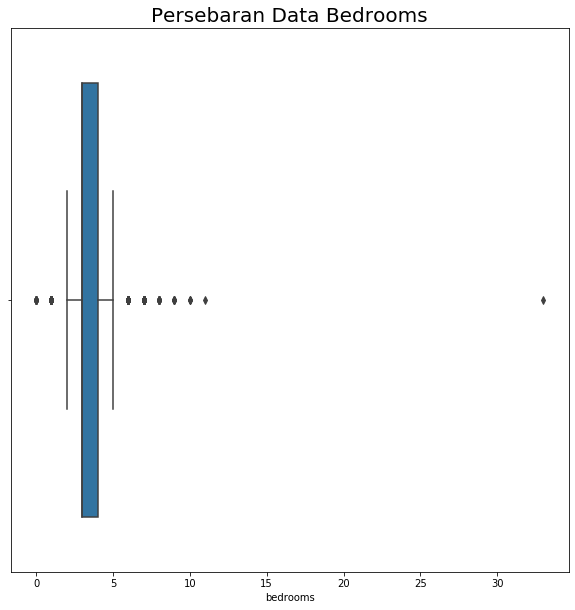

In [63]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'bedrooms', data = data)
plt.title("Persebaran Data Bedrooms", size=20)
plt.show()

# Garis hitam menunjukkan batas data outlayer 
# Garis kiri biru menunjukkan data Q1 sampai Garis kanan biru kanan menunjukkan data Q3

In [60]:
# Tujuan normalisasi adalah agar data outlayer dapat diminimalisir
# Modul sklearn digunakan untuk normalisasi data khususnya numerical sehingga data dapat di fitting agar lebih bagus
# Dengan data antara 0.0 - 1.0

from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
data_m = scaler1.fit_transform(data_num)
data_l = scaler2.fit_transform(data_cat)

data_l

array([[0. , 0.5, 0. ],
       [0. , 0.5, 0. ],
       [0. , 0.5, 0. ],
       ...,
       [0. , 0.5, 0. ],
       [0. , 0.5, 0. ],
       [0. , 0.5, 0. ]])

In [41]:
# Proses Memasukkan Data Array Ke Data Frame
data_m = pd.DataFrame(=, columns = ['price','bedrooms','bathrooms'])
data_m.head()

,price,bedrooms,bathrooms
0,0.019266,0.090909,0.12500
1,0.060721,0.090909,0.28125
2,0.013770,0.060606,0.12500
3,0.069377,0.121212,0.37500
4,0.057049,0.090909,0.25000


In [50]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 3 columns):
price        21613 non-null float64
bedrooms     21613 non-null float64
bathrooms    21613 non-null float64
dtypes: float64(3)
memory usage: 506.7 KB


In [66]:
# Normalisasi Data Categorial

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(data_cat.iloc[:,1])
encoder.classes_

array([1, 2, 3, 4, 5], dtype=int64)

In [68]:
a = encoder.transform(data_cat.iloc[:,1])
a = pd.DataFrame(a)
a

,0
0,2
1,2
2,2
3,4
4,2
...,...
21608,2
21609,2
21610,2
21611,2


In [70]:
# Menggabungkan Data Yang Telah Dinormalisasi dan isi data category agar diketahui jumlah yang di normalisasi
data_cat.join(a).head()

,view,condition,waterfront,0
0,0,3,0,2
1,0,3,0,2
2,0,3,0,2
3,0,5,0,4
4,0,3,0,2


In [71]:
length = data_cat.shape[1] 

col = data_cat.columns

for i in range (length):
    print(i)
    a = encoder.fit_transform(data_cat.iloc[:, i:i+1])
    a = pd.DataFrame(a, columns=[col[i]+'new'])
    data_cat = data_cat.join(a)

0
1
2


C:\Users\ShinyQ\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
data_cat.head()

,view,condition,waterfront,viewnew,conditionnew,waterfrontnew
0,0,3,0,0,2,0
1,0,3,0,0,2,0
2,0,3,0,0,2,0
3,0,5,0,0,4,0
4,0,3,0,0,2,0


In [75]:
data_cat.join(data_num).head()

,view,condition,waterfront,viewnew,conditionnew,waterfrontnew,price,bedrooms,bathrooms
0,0,3,0,0,2,0,221900.0,3,1.00
1,0,3,0,0,2,0,538000.0,3,2.25
2,0,3,0,0,2,0,180000.0,2,1.00
3,0,5,0,0,4,0,604000.0,4,3.00
4,0,3,0,0,2,0,510000.0,3,2.00


In [84]:
ExportData = pd.DataFrame(data_cat.join(data_num), columns = ['view','condition','waterfront','viewnew','conditionnew','waterfrontnew','price','bedrooms','bathrooms'])
ExportData.to_csv("Data_Rumah.csv", index = False)